#NASA SPACE APP CHALLENGE

In [ ]:
import pandas as pd 

df= pd.read_csv ("C:\\Users\\Dell\\OneDrive\\Desktop\\Projects\\ExoPlanet Dataset\\KeplerExoplanetsDataset.csv")
print(df.head())
print(df.info())
print(df.describe())



In [ ]:
print(df.isnull().sum())

In [ ]:
drop_cols = [
    'kepler_name', 'koi_score', 'koi_tce_plnt_num', 'koi_tce_delivname',
    'koi_period_err1','koi_period_err2', 'koi_time0bk_err1','koi_time0bk_err2',
    'koi_impact', 'koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2',
    'koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2',
    'koi_teq','koi_teq_err1','koi_teq_err2','koi_insol','koi_insol_err1','koi_insol_err2',
    'koi_model_snr','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2',
    'koi_srad','koi_srad_err1','koi_srad_err2'
]

df = df.drop(columns=drop_cols)



In [ ]:
print(df)


In [ ]:
df['koi_kepmag']= df['koi_kepmag'].fillna(df['koi_kepmag'].median())


In [ ]:
print(df)

In [21]:
print(df.isnull().sum())
#data set is clean nand ready to use 


kepid               0
kepoi_name          0
koi_disposition     0
koi_pdisposition    0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_time0bk         0
ra                  0
dec                 0
koi_kepmag          0
dtype: int64


In [26]:
#normalizing the data - between [0,1]
from sklearn.preprocessing import MinMaxScaler
num_cols=['koi_period', 'koi_time0bk','koi_kepmag']
scaler= MinMaxScaler()
df[num_cols]= scaler.fit_transform(df[num_cols])
print(df[num_cols].head())


   koi_period  koi_time0bk  koi_kepmag
0    0.000017     0.001662    0.335353
1    0.000015     0.000623    0.268237
2    0.000036     0.003178    0.169364
3    0.000028     0.027375    0.342563
4    0.000035     0.009215    0.360436


In [31]:
#creating labels -> 1- confirmed exoplanet , 0= else not an exoplanet 

df['label']= df['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)
print(df['label'].value_counts())

#class distribution -> 0 -> 6818 candidate or false psitive and 1 - 2746 -confirmed exoplanets

label
0    6818
1    2746
Name: count, dtype: int64


In [32]:
#checking the values - its CONFIRMED not confirmed 
print(df['koi_disposition'].unique())


['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [38]:
#split teh data into train validation and test sets 
from sklearn.model_selection import train_test_split

#features 
X= df[['koi_period', 'koi_time0bk', 'koi_kepmag', 'koi_fpflag_nt' , 'koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec']]
y= df['label']

#split 70% train , 15% validation , 15% test data 
X_train , X_temp , y_train, y_temp= train_test_split(X,y, test_size= 0.3 , random_state= 42 , stratify=y)
x_val , x_test , y_val , y_test = train_test_split(X_temp , y_temp , test_size = 0.5 , random_state = 42, stratify = y_temp)

print("Train:", X_train.shape, "Validation:", x_val.shape , "Test:", x_test.shape)

Train: (6694, 7) Validation: (1435, 7) Test: (1435, 7)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#initilaize the random forest
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 42, class_weight='balanced')

#train on training daya 
rf_model.fit(X_train, y_train)

#predict on validation set 
y_val_pred = rf_model.predict(x_val)

#evaluate 
accuracy = accuracy_score(y_val , y_val_pred)
print("Validation Accuracy", accuracy)

#confusion_matrix
cm= confusion_matrix(y_val , y_val_pred)
print("Confusion Matrix:\n", cm)

#detailed classification report 
print(classification_report(y_val , y_val_pred))

Validation Accuracy 0.7923344947735191
Confusion Matrix:
 [[838 185]
 [113 299]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1023
           1       0.62      0.73      0.67       412

    accuracy                           0.79      1435
   macro avg       0.75      0.77      0.76      1435
weighted avg       0.81      0.79      0.80      1435



In [51]:
"""import shap
shap.initjs()

# Create a SHAP explainer
explainer = shap.Explainer(rf_model, x_val)

# Compute SHAP values
shap_values = explainer(x_val)

# Summary plot (global feature importance)
shap.summary_plot(shap_values.values, x_val)  # .values gives correct shape

# Force plot for first row
row = x_val.iloc[0]
shap.force_plot(shap_values.base_values[0], shap_values.values[0,:], row)"""


'import shap\nshap.initjs()\n\n# Create a SHAP explainer\nexplainer = shap.Explainer(rf_model, x_val)\n\n# Compute SHAP values\nshap_values = explainer(x_val)\n\n# Summary plot (global feature importance)\nshap.summary_plot(shap_values.values, x_val)  # .values gives correct shape\n\n# Force plot for first row\nrow = x_val.iloc[0]\nshap.force_plot(shap_values.base_values[0], shap_values.values[0,:], row)'

koi_period: 0.0270
koi_time0bk: -0.0003
koi_kepmag: -0.0151
koi_fpflag_nt: 0.0336
koi_fpflag_ss: 0.0737
koi_fpflag_co: 0.0397
koi_fpflag_ec: 0.0155


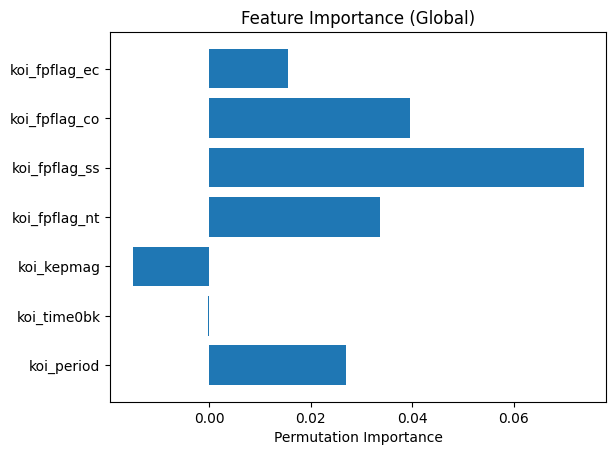

In [63]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on validation set
perm_importance = permutation_importance(rf_model, x_val, y_val, n_repeats=10, random_state=42)

# Print feature importance
for i, col in enumerate(x_val.columns):
    print(f"{col}: {perm_importance.importances_mean[i]:.4f}")

# Optional: plot importance
import matplotlib.pyplot as plt
plt.barh(x_val.columns, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Global)")
plt.show()


In [68]:
# Pick the first row of x_val
row = x_val.iloc[[0]]  # note the double brackets! This keeps it as a DataFrame

# Predict probability for class 1 (confirmed exoplanet)
prob = rf_model.predict_proba(row)[0, 1]

print("Prediction probability for this row:", prob)


Prediction probability for this row: 0.0


In [74]:
# Reset indices
x_val_reset = x_val.reset_index(drop=True)
y_val_reset = y_val.reset_index(drop=True)

# Select rows that are class 1 (confirmed exoplanet)
confirmed_rows = x_val_reset[y_val_reset == 1]

# Take first 5 confirmed exoplanets
rows = confirmed_rows.iloc[:5]

# Predict probabilities for class 1
probs = rf_model.predict_proba(rows)[:, 1]
print("Prediction probabilities for confirmed exoplanets:", probs)


Prediction probabilities for confirmed exoplanets: [0.4  0.48 0.57 0.74 0.48]


In [76]:
import pandas as pd

for i, row in rows.iterrows():
    print(f"\nRow {i} features:")
    print(row)
    # Get feature importances contribution for this row
    contrib = row * rf_model.feature_importances_
    contrib_percent = 100 * contrib / contrib.sum()
    print("Feature contribution percentages:\n", contrib_percent)



Row 6 features:
koi_period       0.000282
koi_time0bk      0.039724
koi_kepmag       0.633044
koi_fpflag_nt    0.000000
koi_fpflag_ss    0.000000
koi_fpflag_co    0.000000
koi_fpflag_ec    0.000000
Name: 6, dtype: float64
Feature contribution percentages:
 koi_period        0.060797
koi_time0bk       6.736641
koi_kepmag       93.202562
koi_fpflag_nt     0.000000
koi_fpflag_ss     0.000000
koi_fpflag_co     0.000000
koi_fpflag_ec     0.000000
Name: 6, dtype: float64

Row 11 features:
koi_period       0.000053
koi_time0bk      0.012330
koi_kepmag       0.685741
koi_fpflag_nt    0.000000
koi_fpflag_ss    0.000000
koi_fpflag_co    0.000000
koi_fpflag_ec    0.000000
Name: 11, dtype: float64
Feature contribution percentages:
 koi_period        0.011092
koi_time0bk       2.028910
koi_kepmag       97.959997
koi_fpflag_nt     0.000000
koi_fpflag_ss     0.000000
koi_fpflag_co     0.000000
koi_fpflag_ec     0.000000
Name: 11, dtype: float64

Row 12 features:
koi_period       0.000041
koi_time0bk

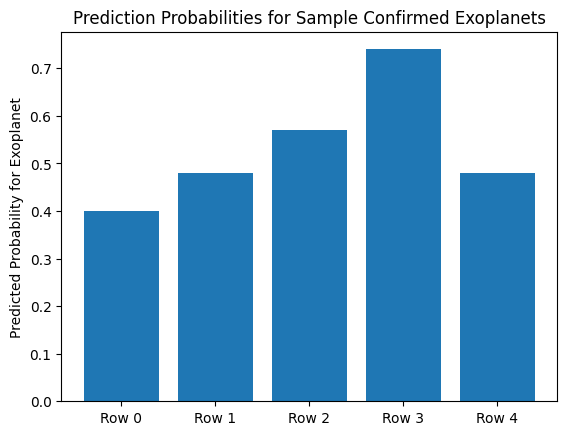

In [79]:
import matplotlib.pyplot as plt

plt.bar(range(len(probs)), probs)
plt.xticks(range(len(probs)), [f"Row {i}" for i in range(len(probs))])
plt.ylabel("Predicted Probability for Exoplanet")
plt.title("Prediction Probabilities for Sample Confirmed Exoplanets")
plt.show()


In [82]:
result_df = rows.copy()
result_df['predicted_prob'] = probs
result_df.to_csv("confirmed_exoplanet_predictions.csv", index=False)


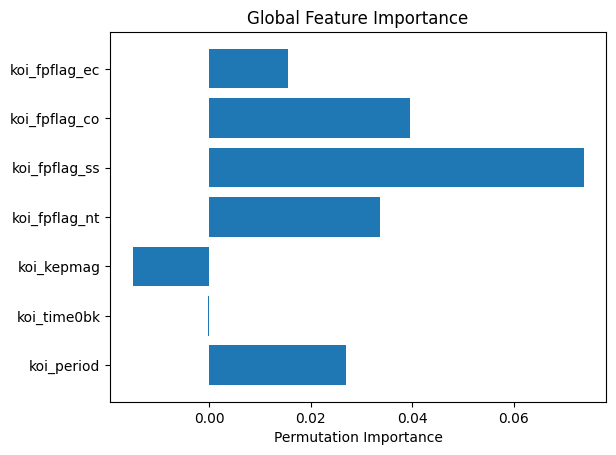

In [86]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_model, x_val, y_val, n_repeats=10, random_state=42)
plt.barh(x_val.columns, perm_importance.importances_mean)
plt.xlabel("Permutation Importance")
plt.title("Global Feature Importance")
plt.show()


Step 3: Rank Predicted Candidates

Rank all exoplanet candidates in the validation/test set by predicted probability.

Optionally, calculate a habitability score using features like koi_prad (planet radius) or koi_teq (equilibrium temperature).


In [89]:



pred_probs = rf_model.predict_proba(x_val)[:,1]  # Probability of class 1
results = x_val.copy()
results['predicted_prob'] = pred_probs
top_candidates = results.sort_values('predicted_prob', ascending=False).head(10)
print(top_candidates)


      koi_period  koi_time0bk  koi_kepmag  koi_fpflag_nt  koi_fpflag_ss  \
590     0.000045     0.037786    0.676383              0              0   
673     0.000109     0.040291    0.532561              0              0   
574     0.000104     0.040159    0.554422              0              0   
250     0.000153     0.037612    0.605431              0              0   
27      0.000042     0.037282    0.518447              0              0   
202     0.000022     0.036563    0.618394              0              0   
255     0.000037     0.037889    0.682289              0              0   
528     0.000065     0.037071    0.677687              0              0   
1154    0.000011     0.036936    0.602286              0              0   
172     0.000106     0.037788    0.583570              0              0   

      koi_fpflag_co  koi_fpflag_ec  predicted_prob  
590               0              0            0.99  
673               0              0            0.99  
574            

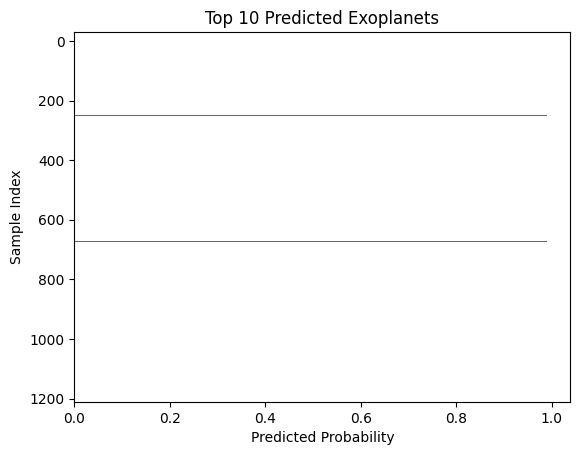

In [92]:
import matplotlib.pyplot as plt

plt.barh(top_candidates.index, top_candidates['predicted_prob'])
plt.xlabel("Predicted Probability")
plt.ylabel("Sample Index")
plt.title("Top 10 Predicted Exoplanets")
plt.gca().invert_yaxis()  # Highest probability on top
plt.show()


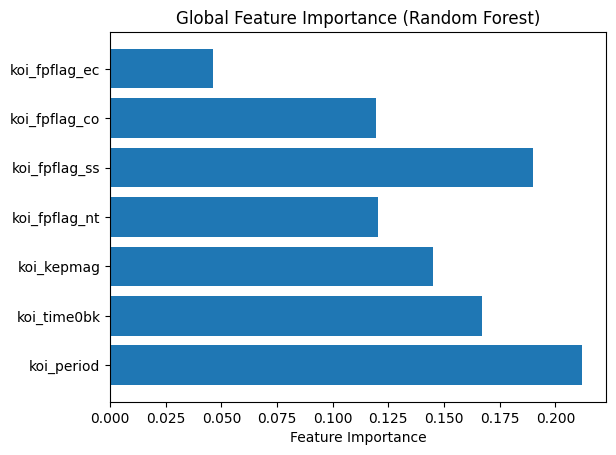

In [93]:
importances = rf_model.feature_importances_
plt.barh(x_val.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Global Feature Importance (Random Forest)")
plt.show()
